<a href="https://colab.research.google.com/github/alexc6h6/Classification-Model/blob/master/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
! ls '/content/drive/My Drive/heart_disease'

heart.csv


In [0]:
data = pd.read_csv('/content/drive/My Drive/heart_disease/heart.csv')

In [5]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
data['trestbps'] = np.log(data['trestbps'])
data['chol'] = np.log(data['chol'])
data['thalach'] = np.square(data['thalach'])
data['oldpeak'] = np.log1p(data['oldpeak'])


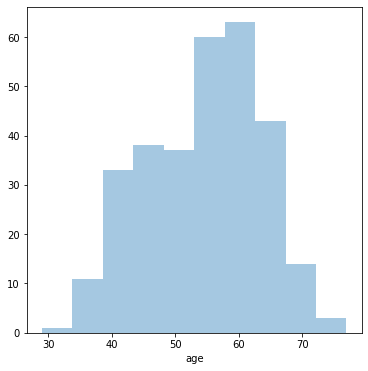

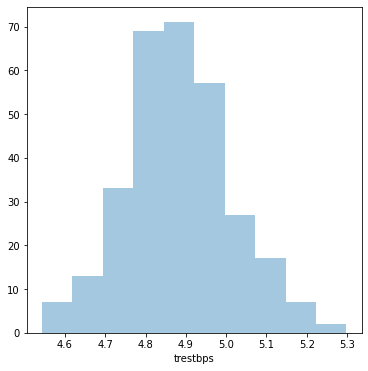

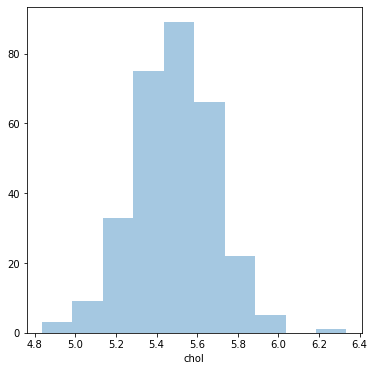

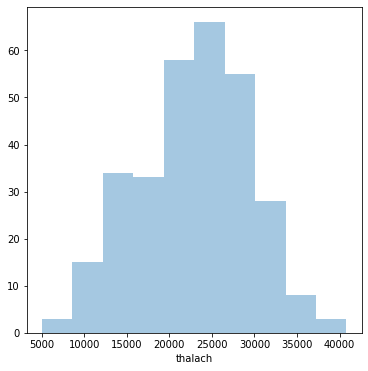

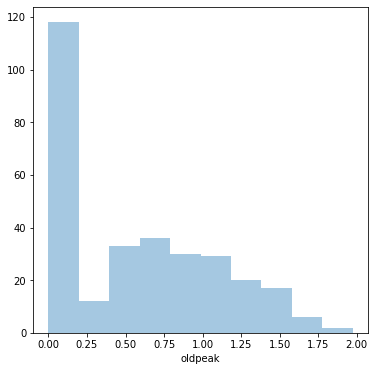

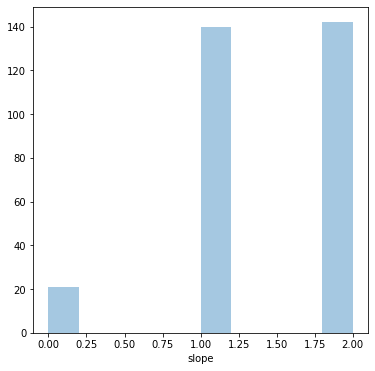

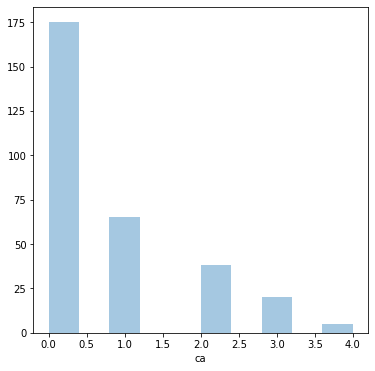

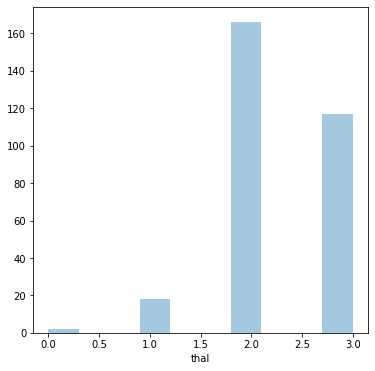

In [7]:
def num_feature(data, cols):
  for col in cols:
    fig = plt.figure(figsize = (6,6))
    ax = fig.gca()
    sns.distplot(data[col], bins = 10, kde = False)
    plt.xlabel(col)
    plt.show()

cols_1 = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope',
          'ca', 'thal']

num_feature(data, cols_1)

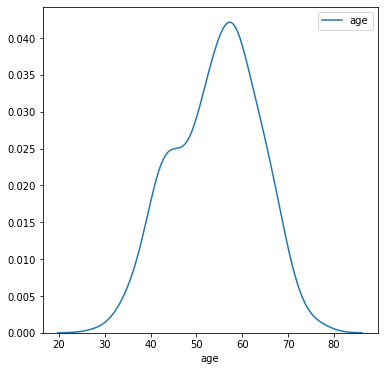

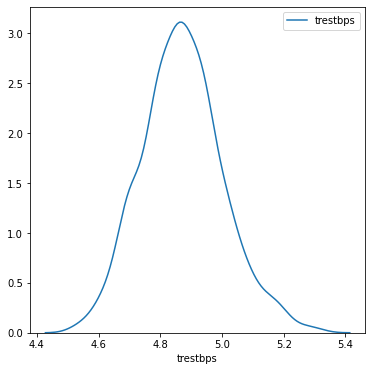

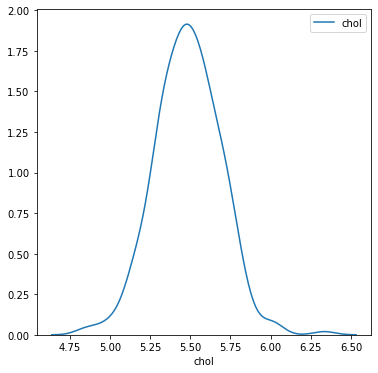

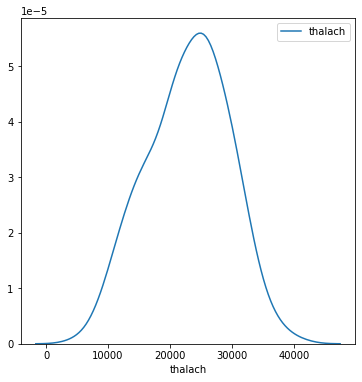

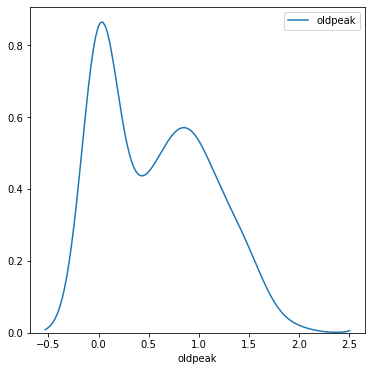

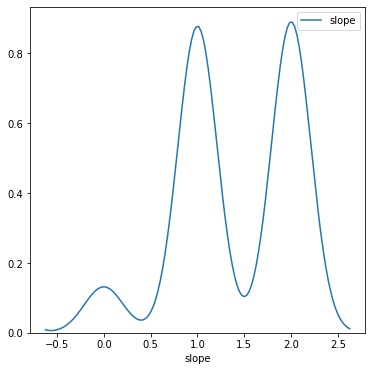

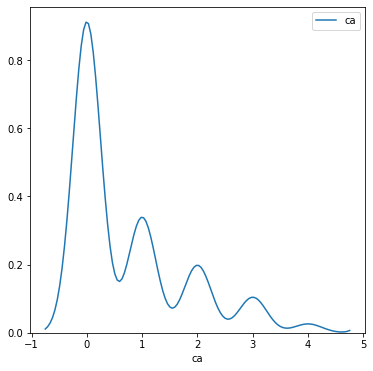

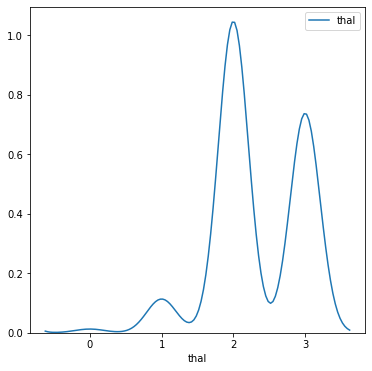

In [8]:
def num_feature_2(data, cols):
  for col in cols:
    fig = plt.figure(figsize = (6,6))
    ax = fig.gca()
    sns.kdeplot(data[col])
    plt.xlabel(col)
    plt.show()

cols_1 = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope',
          'ca', 'thal']

num_feature_2(data, cols_1)

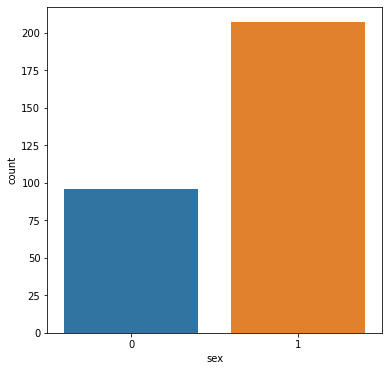

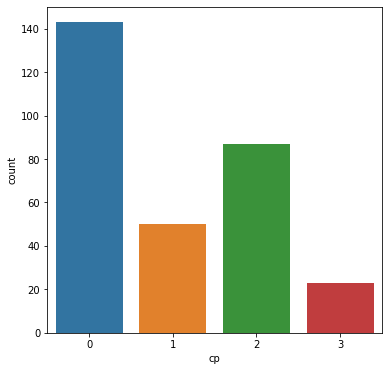

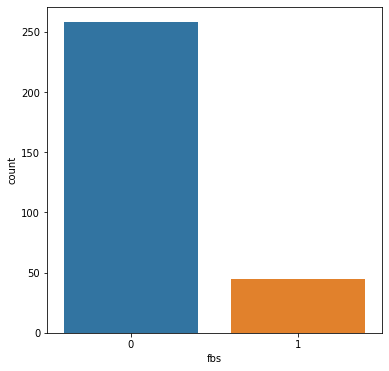

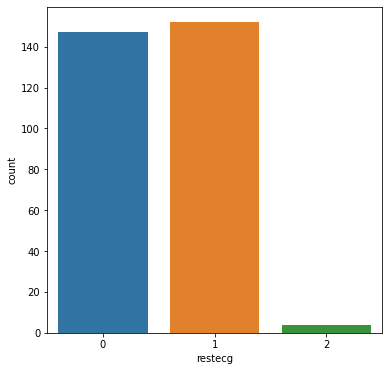

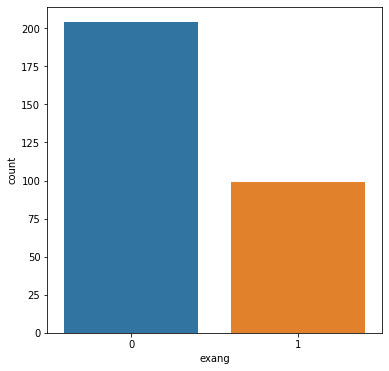

In [9]:
def cat_feature(data, cols):
  for col in cols:
    fig = plt.figure(figsize = (6,6))
    ax = fig.gca()
    sns.countplot(x = col, data = data)
    plt.xlabel(col)
    plt.show()

cols_2 = ['sex', 'cp', 'fbs', 'restecg', 'exang']
cat_feature(data, cols_2)

In [0]:
#data.loc[data['age'] > 5000, 'age'] = data['age'].mean()
#data.loc[data['trestbps'] > 5.2, 'trestbps'] = data['trestbps'].mean()
#data.loc[data['trestbps'] < 4.6, 'trestbps'] = data['trestbps'].mean()
#data.loc[data['chol'] > 6.0, 'chol'] = data['chol'].mean()
#data.loc[data['chol'] < 5.0, 'chol'] = data['chol'].mean()
#data.loc[data['thalach'] > 37000, 'thalach'] = data['thalach'].mean()
#data.loc[data['oldpeak'] > 1.75, 'oldpeak'] = data['oldpeak'].mean()


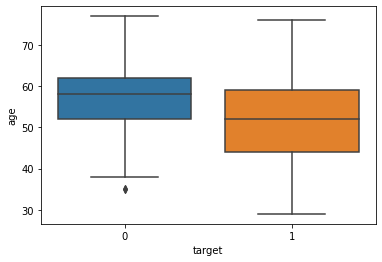

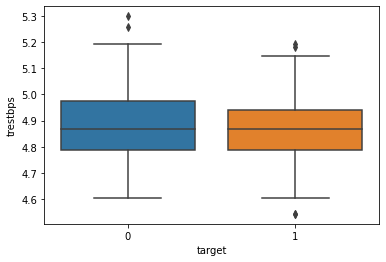

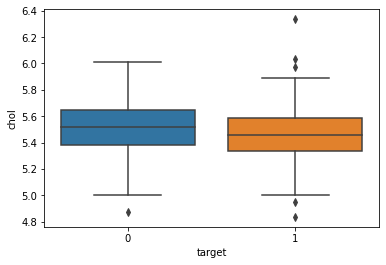

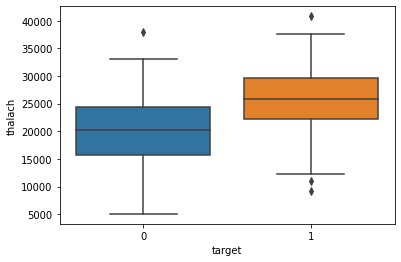

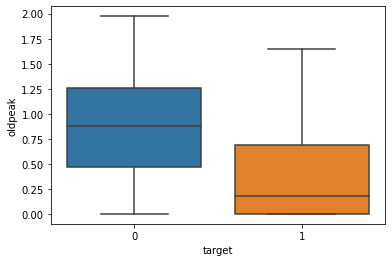

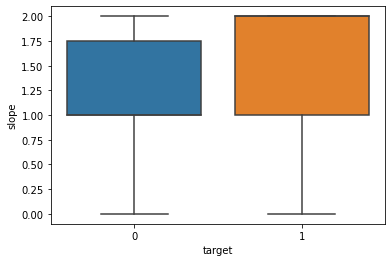

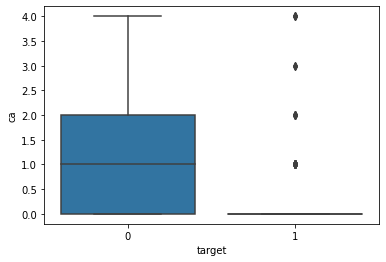

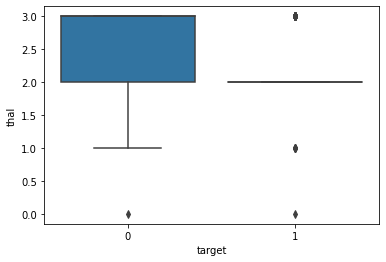

In [11]:
def rela_num_label(data, cols, label):
  for col in cols:
    sns.boxplot(x = label, y = data[col], data = data)
    plt.show()

cols_3 = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope',
          'ca', 'thal']
rela_num_label(data, cols_3, data['target'])

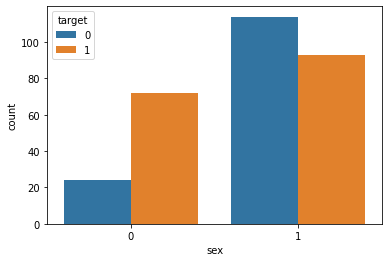

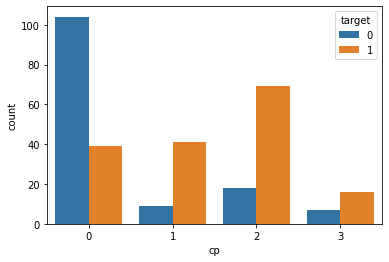

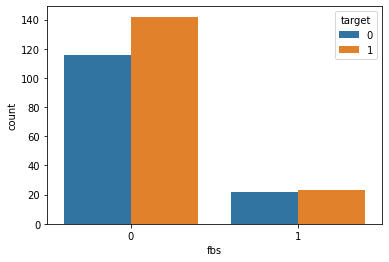

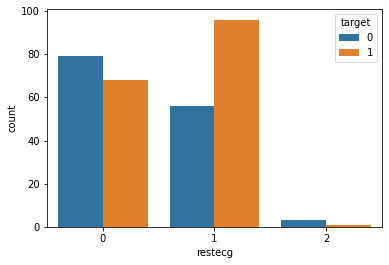

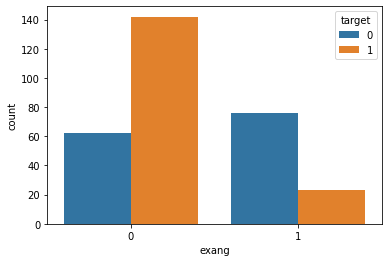

In [12]:
def rela_cat_cat(data, cols, label):
  for col in cols:
    sns.countplot(x = col, data = data, hue = label)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

rela_cat_cat(data, cols_2, data['target'])

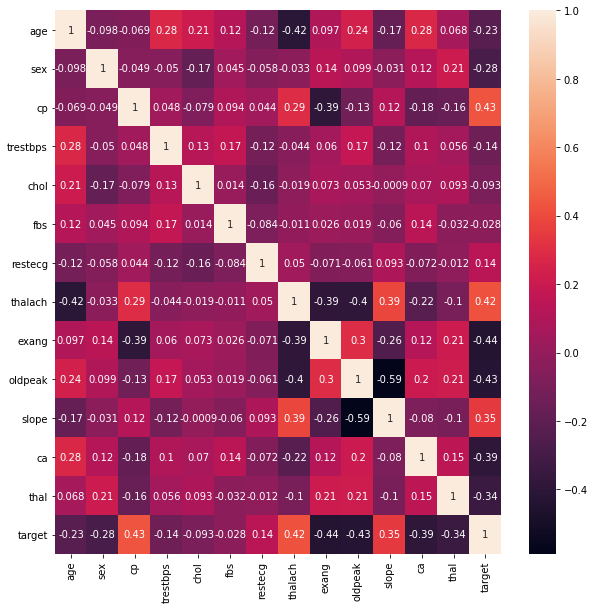

In [13]:
fig = plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [0]:
#from keras.utils import to_categorical
label = data['target'].values.reshape(-1, 1)
#label = to_categorical(label)

data.drop(columns = 'target', inplace = True)

In [0]:
cols_4 = ['sex', 'cp', 'fbs', 'restecg', 'exang']

for col in cols_4:
  data[col] = data[col].astype('object')

In [0]:
data = pd.get_dummies(data)

In [0]:

sc = StandardScaler()
sc.fit(data)
data = sc.transform(data)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size = 0.1)

print(x_train.shape)
print(y_train.shape)

(272, 21)
(272, 1)


In [19]:
logistic = LogisticRegression()
gaussian = GaussianProcessClassifier()
svc = SVC()
rfc = RandomForestClassifier(n_estimators = 400, criterion = 'entropy')

log_score = cross_val_score(logistic, x_train, y_train, cv = 5)
gau_score = cross_val_score(gaussian, x_train, y_train, cv = 5)
svc_score = cross_val_score(svc, x_train, y_train, cv = 5)
rfc_score = cross_val_score(rfc, x_train, y_train, cv = 5)

print(np.max(log_score))
print(np.max(gau_score))
print(np.max(svc_score))
print(np.max(rfc_score))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

0.8727272727272727
0.7592592592592593
0.8888888888888888
0.8518518518518519


In [33]:
model = Sequential()

model.add(Dense(units = 256, input_shape = (21,), kernel_regularizer= regularizers.l2(1.0)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

for i in range(0, 10):
  model.add(Dense(units = 128, kernel_regularizer= regularizers.l2(1.0)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 256)               5632      
_________________________________________________________________
batch_normalization_35 (Batc (None, 256)               1024      
_________________________________________________________________
activation_35 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_36 (Batc (None, 128)               512       
_________________________________________________________________
activation_36 (Activation)   (None, 128)              

In [0]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              patience = 5, 
                              min_lr = 0.00001,
                              verbose = 1, 
                              factor = 0.033)


In [35]:
batch = 64
epochs = 400

history = model.fit(x_train, y_train,
                    batch_size = batch, 
                    epochs = epochs, 
                    verbose = 1, 
                    callbacks = [reduce_lr], 
                    validation_split = 0.2)



Train on 217 samples, validate on 55 samples
Epoch 1/400
217/217 [==============================] - 2s 9ms/step - loss: 1329.9738 - acc: 0.5714 - val_loss: 1256.7352 - val_acc: 0.6000
Epoch 2/400
217/217 [==============================] - 0s 306us/step - loss: 1225.6206 - acc: 0.4793 - val_loss: 1156.6105 - val_acc: 0.4909
Epoch 3/400
217/217 [==============================] - 0s 366us/step - loss: 1127.4213 - acc: 0.4885 - val_loss: 1062.6947 - val_acc: 0.4909
Epoch 4/400
217/217 [==============================] - 0s 325us/step - loss: 1035.4064 - acc: 0.5023 - val_loss: 974.9397 - val_acc: 0.4909
Epoch 5/400
217/217 [==============================] - 0s 319us/step - loss: 949.5020 - acc: 0.5207 - val_loss: 893.1884 - val_acc: 0.4909
Epoch 6/400
217/217 [==============================] - 0s 313us/step - loss: 869.5090 - acc: 0.5714 - val_loss: 817.2567 - val_acc: 0.4909
Epoch 7/400
217/217 [==============================] - 0s 316us/step - loss: 795.3333 - acc: 0.5115 - val_loss: 746.

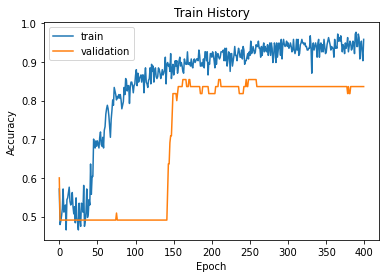

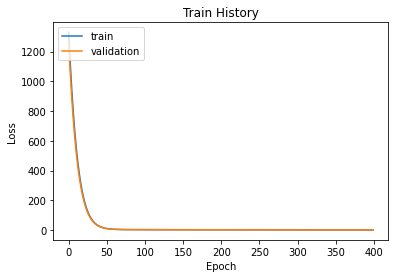

In [36]:
def show_train_history_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

def show_train_history_loss(history):
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

show_train_history_acc(history)
show_train_history_loss(history)

In [48]:
from sklearn.metrics import accuracy_score

prediction = model.predict(x_test).round(0).astype('int64')
score = accuracy_score(y_test, prediction)
print(score)

0.8064516129032258
